In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import re

from nltk.tokenize import word_tokenize

pd.set_option('mode.chained_assignment', None)


nltk.download('stopwords')
nltk.download('punkt')

STOPWORDS = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/tales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [378]:
DATASET = 'fakeWhatsApp.BR_2020_partial.csv'

In [379]:
df = pd.read_csv(os.path.join('data', '2020', DATASET))

In [380]:
df.shape, df.columns

((2899, 5),
 Index(['shares', 'text', 'misinformation', 'source', 'revision'], dtype='object'))

In [381]:
df.head()

shares                                               text  misinformation  \
0      27  O ministro da Ciência, Tecnologia, Inovações e...             0.0   
1      26  Pesquisa com mais de 6.000 médicos em 30 paíse...             1.0   
2      25  É com muita alegria que comunico que mais um p...             0.0   
3      25  Renda Brasil unificará vários programas sociai...             0.0   
4      24  O Secretário-Geral da OTAN Jens Stoltenberg ta...             0.0   

                                              source  revision  
0  https://www.gov.br/pt-br/noticias/educacao-e-p...       NaN  
1  https://www.aosfatos.org/noticias/e-falso-que-...       NaN  
2  http://portal.mec.gov.br/component/content/art...       NaN  
3  https://agenciabrasil.ebc.com.br/politica/noti...       NaN  
4                                                NaN       1.0

<AxesSubplot:>

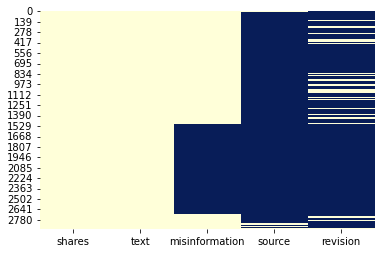

In [382]:
# Visualização geral de dados faltantes
sns.heatmap(df.isna(), cmap='YlGnBu', cbar=False)

In [383]:
# Comparando quantos dados faltantes existem no atributo text
print(df['text'].notnull().sum(), df.shape[0])

df = df[df['text'].notnull()]

2898 2899


## Distribuição das classes

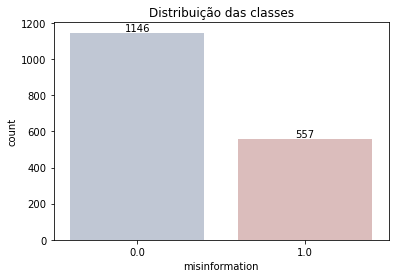

In [384]:
plt.hist(df['misinformation'])
plt.title("Distribuição das classes")
ax = sns.countplot(x='misinformation', data=df, palette='vlag')
ax.bar_label(ax.containers[1])
plt.show()

In [385]:
df.iloc[847]

shares                                                            1
text              Enquanto aqui no Amapá  as outras doenças e  q...
misinformation                                                  1.0
source                                                          NaN
revision                                                        NaN
Name: 848, dtype: object

In [386]:
# Usando apenas os dados que contem 'misinformation'
df = df[df['misinformation'].notnull()]

## Criando features a partir do texto

In [387]:
def count_chars(text):
    """Counts the number of characters in a message."""
    return len(text)

def count_words(text):
    """Counts the number of words in a message."""
    return len(text.split())

def count_capital_chars(text):
    """Counts the number of capital characters in a message."""
    counter = 0
    for word in text:
        if word.isupper():
            counter += 1
    return counter

def count_capital_words(text):
    """Counts the number of capital words in a message."""
    return sum(map(str.isupper, text.split()))

def count_punctuations(text):
    """Return a dictionary of 32 punctuation counts."""
    punctuations="""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
    
    punctuactions_countings = dict()
    
    for punct in punctuations:
        punctuactions_countings[str(punct) + ' count'] = text.count(punct)
        
    return punctuactions_countings

def count_words_in_quotes(text):
    """Counts the number of words in both single and double quotation."""
    x = re.findall("""'.'|".""""", text)
    
    counter = 0
    
    if x is None:
        return 0
    else:
        for index in x:
            t = index[1:-1]
            counter += count_words(t)
        return counter

def count_sent(text):
    """Counts the number of sentences in a message."""
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    """Counts the number of unique words in a message."""
    return len(set(text.split()))

def count_htags(text):
    """Counts the number of hashtags in a text."""
    htags_w = re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', text)
    return len(htags_w)

def count_mentions(text):
    """Counts the amount of times users have been mentioned."""
    mentions_w = re.findall(r'\B@\w+', text)
    return len(mentions_w)

def count_stopwords(text):
    """Count the number of stopwords in a message."""
    stop_words = set(STOPWORDS)
    word_tokens = word_tokenize(text)
    stopwords_x = [word for word in word_tokens if word in stop_words]
    return len(stopwords_x)

def count_links(text):
    """Counts the number of links present in a message."""
    pattern = r"(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
    return len(re.findall(pattern, text))

def remove_links(text):
    pttrn = r"(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
    return re.sub(pttrn, " ", text)

def remove_whitespaces(text):
    return text.strip()

def set_lowercase(text):
    return text.lower()

def check_lol(text):
    PATTERN_1 = r"(k|K){2,}"
    # PATTERN_2 = r"((h|H)(a|A)){2,}"
    return bool(re.search(pattern=PATTERN_1, string=text))

def clean_lol(text):
    PATTERN_1 = r"(k|K){2,}"
    return re.sub(pattern=PATTERN_1, repl="", string=txt)

### Aplicando as transformações para criação das features

In [388]:
df['char_count']         = df["text"].apply(lambda msg: count_chars(msg))
df['word_count']         = df["text"].apply(lambda msg: count_words(msg))
df['sent_count']         = df["text"].apply(lambda msg: count_sent(msg))
df['capital_char_count'] = df["text"].apply(lambda msg: count_capital_chars(msg))
df['capital_word_count'] = df["text"].apply(lambda msg: count_capital_words(msg))
df['quoted_word_count']  = df["text"].apply(lambda msg: count_words_in_quotes(msg))
df['stopword_count']     = df["text"].apply(lambda msg: count_stopwords(msg))
df['unique_word_count']  = df["text"].apply(lambda msg: count_unique_words(msg))
df['htag_count']         = df["text"].apply(lambda msg: count_htags(msg))
df['mention_count']      = df["text"].apply(lambda msg: count_mentions(msg))
df['punct_count']        = df["text"].apply(lambda msg: count_punctuations(msg))
df['avg_wordlength']     = df['char_count'] / df['word_count']
df['avg_sentlength']     = df['word_count'] / df['sent_count']
df['unique_vs_words']    = df['unique_word_count'] / df['word_count']
df['stopwords_vs_words'] = df['stopword_count'] / df['word_count']
df['links_count']        = df["text"].apply(lambda msg: count_links(msg))
df['clean_text']         = df["text"].apply(lambda msg: remove_links(msg))
df['clean_text']         = df["clean_text"].apply(lambda msg: remove_whitespaces(msg))
df['has_lol']            = df["text"].apply(lambda msg: check_lol(msg))
df['clean_text']         = df["clean_text"].apply(lambda msg: set_lowercase(msg))

In [389]:
df.reset_index(inplace=True)

## Visualizando frequência das palavras

In [390]:
from wordcloud import WordCloud

In [391]:
# text = " ".join(df['clean_text'])
text_misinfo = " ".join(df[df['misinformation'] == 1]['clean_text'])
text_info = " ".join(df[df['misinformation'] == 0]['clean_text'])

(-0.5, 749.5, 499.5, -0.5)

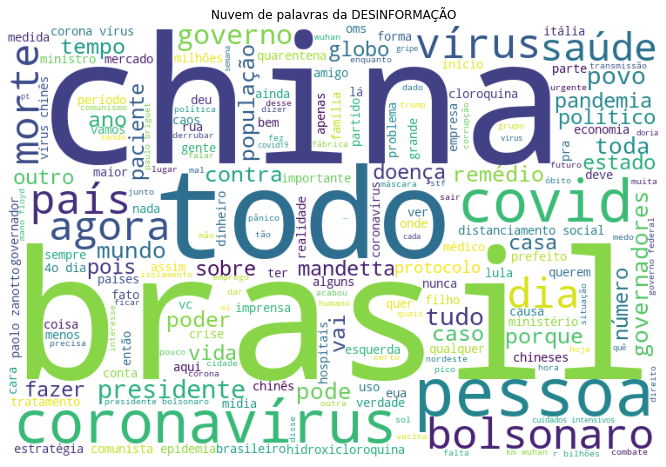

In [392]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=750, height=500).generate(text_misinfo)

plt.figure(figsize=(18, 8))
plt.title("Nuvem de palavras da DESINFORMAÇÃO")
plt.imshow(wc)
plt.axis("off")

(-0.5, 749.5, 499.5, -0.5)

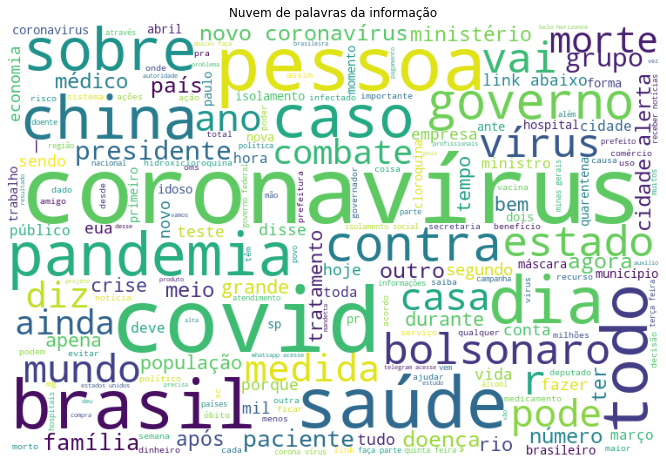

In [393]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=750, height=500).generate(text_info)

plt.figure(figsize=(18, 8))
plt.title("Nuvem de palavras da informação")
plt.imshow(wc)
plt.axis("off")

## Aplicando o modelo

### Vetorização

In [394]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [395]:
# Criar instância da classe tfidf
tfidf = TfidfVectorizer(stop_words=STOPWORDS)

In [396]:
# Construir a matrix TF-IDF ajustando e transformando os dados
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

In [397]:
tfidf_matrix.shape

(1703, 16812)

In [398]:
from sklearn.metrics.pairwise import linear_kernel

### Calculando simularidade via cosseno

In [399]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [400]:
cosine_sim.shape

(1703, 1703)

In [401]:
idxs = pd.Series(df.index)

In [402]:
def get_recommendations(index, cosine_sim):
    try:
        idx = idxs.iloc[index]
    except KeyError:
        print('Index not found!')
        return None
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    
    # msg_indices = [score[0] for score in sim_scores]
    
    return sim_scores

In [403]:
MSG_INDEX = 4

print(df.iloc[MSG_INDEX]['text'])
print(df.iloc[MSG_INDEX]['misinformation'])

O Secretário-Geral da OTAN Jens Stoltenberg também ex Primeiro Ministro da Noruega 2000-2013 em seu pronunciamento sobre o lançamento do programa #NATO2030 - Fortalecendo a Aliança em um mundo cada vez mais competitivo deixa a seguinte mensagem: "A aliança precisa e deve enfrentar a China!", OTAN Vídeo: Hoje no mundo Militar...
https://dunapress.org/2020/06/11/50619/
0.0


### Gerando as cinco mensagens mais similares à mensagem de índice `MSG_INDEX`

In [404]:
recommendations = get_recommendations(MSG_INDEX, cosine_sim)

recommendations = pd.DataFrame(recommendations, columns=['index', 'similarity_score'])
recommendations['text'] = df.iloc[recommendations.iloc[:, 0]]['text'].to_list()
recommendations.set_index('index')

similarity_score                                               text
index                                                                     
1396           0.110051  Parece que o embaixador da China é o GOVERNADO...
1353           0.097253  Está uma corrida pela vacina no mundo , quem v...
1545           0.089451  A libertação do Peixe, traficante, “dono” da f...
1281           0.085044               A china já está fodendo o mundo todo
909            0.084573  A libertação do Peixe, traficante, “dono” da f...

### Como definir métrica de acerto?

Uma métrica muito utilizada em problemas de recuperação de informação (por exemplo, engines de busca) é a métrica de **"precisão-recall"**.

Também poderia ser empregada uma combinação delas, mensurada na **métrica F1**: ela é basicamente a média harmônica das duas métricas anteriores.

Entretanto, para que possamos computá-las, precisamos de um padrão *ground-truth* (verdade-absoluta), isto é, alguma informação concedida _a priori_ que orientará a avaliação. A pergunta é então a seguinte: O que poderíamos utilizar como padrão-verdade?

#### Sugestão de padrão _ground-truth_: o atributo `misinformation`

Entretanto, temos um problema: nem todas as mensagens estão com os dados de `misinformation` presentes.

In [405]:
MSG_INDEX = 4

print(df.iloc[MSG_INDEX]['text'])
print(df.iloc[MSG_INDEX]['misinformation'])

df.iloc[recommendations['index']][['text', 'misinformation']]

O Secretário-Geral da OTAN Jens Stoltenberg também ex Primeiro Ministro da Noruega 2000-2013 em seu pronunciamento sobre o lançamento do programa #NATO2030 - Fortalecendo a Aliança em um mundo cada vez mais competitivo deixa a seguinte mensagem: "A aliança precisa e deve enfrentar a China!", OTAN Vídeo: Hoje no mundo Militar...
https://dunapress.org/2020/06/11/50619/
0.0


text  misinformation
1396  Parece que o embaixador da China é o GOVERNADO...             1.0
1353  Está uma corrida pela vacina no mundo , quem v...             0.0
1545  A libertação do Peixe, traficante, “dono” da f...             1.0
1281               A china já está fodendo o mundo todo             1.0
909   A libertação do Peixe, traficante, “dono” da f...             0.0

In [406]:
df.head(3)

index  shares                                               text  \
0      0      27  O ministro da Ciência, Tecnologia, Inovações e...   
1      1      26  Pesquisa com mais de 6.000 médicos em 30 paíse...   
2      2      25  É com muita alegria que comunico que mais um p...   

   misinformation                                             source  \
0             0.0  https://www.gov.br/pt-br/noticias/educacao-e-p...   
1             1.0  https://www.aosfatos.org/noticias/e-falso-que-...   
2             0.0  http://portal.mec.gov.br/component/content/art...   

   revision  char_count  word_count  sent_count  capital_char_count  ...  \
0       NaN         634          76           5                  10  ...   
1       NaN         283          20           2                   1  ...   
2       NaN         653          95           6                  20  ...   

   htag_count  mention_count  \
0           0              0   
1           0              0   
2           0              0   

                                         punct_count  avg_wordlength  \
0  {'! count': 0, '" count': 0, '# count': 0, '$ ...        8.342105   
1  {'! count': 0, '" count': 0, '# count': 0, '$ ...       14.150000   
2  {'! count': 5, '" count': 0, '# count': 0, '$ ...        6.873684   

   avg_sentlength  unique_vs_words stopwords_vs_words  links_count  \
0       15.200000         0.802632           0.368421            1   
1       10.000000         0.950000           0.450000            1   
2       15.833333         0.810526           0.421053            1   

                                          clean_text  has_lol  
0  o ministro da ciência, tecnologia, inovações e...    False  
1  pesquisa com mais de 6.000 médicos em 30 paíse...    False  
2  é com muita alegria que comunico que mais um p...    False  

[3 rows x 24 columns]

In [407]:
df.text

0       O ministro da Ciência, Tecnologia, Inovações e...
1       Pesquisa com mais de 6.000 médicos em 30 paíse...
2       É com muita alegria que comunico que mais um p...
3       Renda Brasil unificará vários programas sociai...
4       O Secretário-Geral da OTAN Jens Stoltenberg ta...
                              ...                        
1698    A torcida do corona deve estar arrancando os c...
1699    “OS EUA E O CORONAVÍRUS :\r\n\r\nAcabei de ass...
1700    Estatísticas falsas conforme depoimentos colhi...
1701    Atenção => 🇧🇷💓💓💓 *MUITO IMPORTANTE! "Como é qu...
1702    [2:36 PM, 11/06/2020] Wellington: ```*ALERTA A...
Name: text, Length: 1703, dtype: object

In [408]:
df.head()

index  shares                                               text  \
0      0      27  O ministro da Ciência, Tecnologia, Inovações e...   
1      1      26  Pesquisa com mais de 6.000 médicos em 30 paíse...   
2      2      25  É com muita alegria que comunico que mais um p...   
3      3      25  Renda Brasil unificará vários programas sociai...   
4      4      24  O Secretário-Geral da OTAN Jens Stoltenberg ta...   

   misinformation                                             source  \
0             0.0  https://www.gov.br/pt-br/noticias/educacao-e-p...   
1             1.0  https://www.aosfatos.org/noticias/e-falso-que-...   
2             0.0  http://portal.mec.gov.br/component/content/art...   
3             0.0  https://agenciabrasil.ebc.com.br/politica/noti...   
4             0.0                                                NaN   

   revision  char_count  word_count  sent_count  capital_char_count  ...  \
0       NaN         634          76           5                  10  ...   
1       NaN         283          20           2                   1  ...   
2       NaN         653          95           6                  20  ...   
3       NaN         484          60           4                  12  ...   
4       1.0         370          52           2                  27  ...   

   htag_count  mention_count  \
0           0              0   
1           0              0   
2           0              0   
3           0              0   
4           0              0   

                                         punct_count  avg_wordlength  \
0  {'! count': 0, '" count': 0, '# count': 0, '$ ...        8.342105   
1  {'! count': 0, '" count': 0, '# count': 0, '$ ...       14.150000   
2  {'! count': 5, '" count': 0, '# count': 0, '$ ...        6.873684   
3  {'! count': 0, '" count': 0, '# count': 0, '$ ...        8.066667   
4  {'! count': 1, '" count': 2, '# count': 1, '$ ...        7.115385   

   avg_sentlength  unique_vs_words stopwords_vs_words  links_count  \
0       15.200000         0.802632           0.368421            1   
1       10.000000         0.950000           0.450000            1   
2       15.833333         0.810526           0.421053            1   
3       15.000000         0.833333           0.283333            1   
4       26.000000         0.884615           0.288462            1   

                                          clean_text  has_lol  
0  o ministro da ciência, tecnologia, inovações e...    False  
1  pesquisa com mais de 6.000 médicos em 30 paíse...    False  
2  é com muita alegria que comunico que mais um p...    False  
3  renda brasil unificará vários programas sociai...    False  
4  o secretário-geral da otan jens stoltenberg ta...    False  

[5 rows x 24 columns]

In [409]:
df.shape

(1703, 24)

In [410]:
2898*2898

8398404

In [411]:
df.columns

Index(['index', 'shares', 'text', 'misinformation', 'source', 'revision',
       'char_count', 'word_count', 'sent_count', 'capital_char_count',
       'capital_word_count', 'quoted_word_count', 'stopword_count',
       'unique_word_count', 'htag_count', 'mention_count', 'punct_count',
       'avg_wordlength', 'avg_sentlength', 'unique_vs_words',
       'stopwords_vs_words', 'links_count', 'clean_text', 'has_lol'],
      dtype='object')

In [412]:
INDEX_0 = 4
INDEX_1 = 5

In [413]:
# USED_COLUMNS = [
#     'shares', 'misinformation', 'char_count', 'word_count', 'sent_count', 'capital_char_count',
#     'capital_word_count', 'quoted_word_count', 'stopword_count', 'unique_word_count', 'htag_count',
#     'mention_count', 'links_count'
# ]

# USED_COLUMNS = [
#     'shares', 'misinformation', 'char_count', 'word_count', 'sent_count', 'capital_char_count',
#     'capital_word_count', 'stopword_count', 'unique_word_count', 'htag_count',
#     'mention_count', 'avg_sentlength', 'links_count'
# ]

USED_COLUMNS = [
    'shares', 'misinformation', 'char_count', 'word_count', 'sent_count', 'capital_char_count',
    'capital_word_count', 'htag_count',
    'mention_count', 'avg_sentlength', 'links_count'
]

In [414]:
X, Y = df[USED_COLUMNS].iloc[INDEX_0].to_numpy(), df[USED_COLUMNS].iloc[INDEX_1].to_numpy()

In [415]:
from sklearn.metrics.pairwise import euclidean_distances

In [416]:
# np.sqrt((X[0]-Y[0])**2 + (X[1]-Y[1])**2 + (X[2]-Y[2])**2)
# np.linalg.norm(X-Y)

def eucli_dist(X, Y):
    return np.sqrt(np.sum((X-Y)**2))

eucli_dist(X, Y)

226.83694584436637

In [417]:
df_ = df[USED_COLUMNS]

# norm_df = (df_ - df_.mean()) / df_.std()

norm_df = ( df_ - df_.min() ) / ( df_.max() - df_.min() )

# X = df[USED_COLUMNS].to_numpy()
X = norm_df[USED_COLUMNS].to_numpy()
df_.head()

shares  misinformation  char_count  word_count  sent_count  \
0      27             0.0         634          76           5   
1      26             1.0         283          20           2   
2      25             0.0         653          95           6   
3      25             0.0         484          60           4   
4      24             0.0         370          52           2   

   capital_char_count  capital_word_count  htag_count  mention_count  \
0                  10                   3           0              0   
1                   1                   0           0              0   
2                  20                   4           0              0   
3                  12                   2           0              0   
4                  27                   5           0              0   

   avg_sentlength  links_count  
0       15.200000            1  
1       10.000000            1  
2       15.833333            1  
3       15.000000            1  
4       26.000000            1

In [418]:
# norm_df[:10,:11]

norm_df.isnull().sum()

shares                0
misinformation        0
char_count            0
word_count            0
sent_count            0
capital_char_count    0
capital_word_count    0
htag_count            0
mention_count         0
avg_sentlength        0
links_count           0
dtype: int64

In [419]:
distance_sim = euclidean_distances(X, X)

In [420]:
distance_sim

array([[0.        , 1.00096092, 0.07719698, ..., 1.41480091, 1.00304532,
        1.42278194],
       [1.00096092, 0.        , 1.00109751, ..., 0.96212668, 1.39060894,
        0.97744625],
       [0.07719698, 1.00109751, 0.        , ..., 1.36161889, 0.9258921 ,
        1.36915752],
       ...,
       [1.41480091, 0.96212668, 1.36161889, ..., 0.        , 1.00528531,
        0.17418882],
       [1.00304532, 1.39060894, 0.9258921 , ..., 1.00528531, 0.        ,
        1.00394989],
       [1.42278194, 0.97744625, 1.36915752, ..., 0.17418882, 1.00394989,
        0.        ]])

In [421]:
distance_sim.max()

2.2927059871983295

In [422]:
FIRST, SECOND = np.unravel_index(np.argmax(distance_sim), distance_sim.shape)
FIRST, SECOND

(162, 1188)

In [423]:
test[FIRST, SECOND]

44.6997104419352

In [424]:
print(df['text'].iloc[FIRST])
print(180*"-")
print(df['text'].iloc[SECOND])

Pessoal, estamos fabricando máscaras de qualidade e baixo custo para pode ajudar a quem precisa peço que quem puder divulgar divulgue, com esta iniciativa estamos ajudando a população em geral e ajudando a empresa a não fechar as portas com está crise terrível que está matando milhares de pessoas, segue meus Contatos pessoais WhatsApp 11 98601-1174 ou no e-mail vendas@nssolucoes.com.br #farmacia #hospitais #protecao #prevenção #juntossomosfortes #juntosomosmaisfortes #conveniencia #clinicas #varejotech #mercado #coronavirus #covid19
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
https://dash.harvard.edu/bitstream/handle/1/42638988/Social%20distancing%20strategies%20for%20curbing%20the%20COVID-19%20epidemic.pdf?sequence=1&isAllowed=y

Harvard dando razão ao doutor Osmar 👆🏻👆🏻 Citação
     Kissler, Stephen, Christine Tedijanto, Marc Lipsitch e Yonatan Grad.

In [425]:
df_.iloc[[FIRST, SECOND]]

shares  misinformation  char_count  word_count  sent_count  \
162        4             0.0         538          72           1   
1188       1             1.0       31865        4862         249   

      capital_char_count  capital_word_count  htag_count  mention_count  \
162                    4                   0          10              0   
1188                1034                 344           0              0   

      avg_sentlength  links_count  
162        72.000000            0  
1188       19.526104            2

In [426]:
norm_df.iloc[[FIRST, SECOND]]

shares  misinformation  char_count  word_count  sent_count  \
162   0.115385             0.0    0.016729    0.014606         0.0   
1188  0.000000             1.0    1.000000    1.000000         1.0   

      capital_char_count  capital_word_count  htag_count  mention_count  \
162             0.001148            0.000000         1.0            0.0   
1188            0.296700            0.459893         0.0            0.0   

      avg_sentlength  links_count  
162         0.061525     0.000000  
1188        0.016054     0.066667

In [435]:
distance_sim[0, 5]

0.11606784897123182

In [431]:
distance_sim.max()

2.2927059871983295

In [455]:
INDEX = 1180

for i in range(INDEX, INDEX+10):
    print(distance_sim[0, i])

1.4191254967283753
1.414543029595843
1.0010513117793436
1.4630589134824448
1.0009543041286615
1.0010353510542054
1.0008619083440482
1.000984137003908
2.2789421173485658
1.0003699783234132


In [459]:
SIM_LIST_TO_1 = distance_sim[1, :]
SIM_LIST_TO_1

array([1.00096092, 0.        , 1.00109751, ..., 0.96212668, 1.39060894,
       0.97744625])

In [460]:
MOST_SIMILAR_IDX_TO_1 = np.unravel_index(np.argmax(SIM_LIST_TO_1), SIM_LIST_TO_1.shape)
MOST_SIMILAR_IDX_TO_1

(1188,)

In [457]:
norm_df.iloc[[0, 1188]]

shares  misinformation  char_count  word_count  sent_count  \
0        1.0             0.0    0.019743    0.015429    0.016129   
1188     0.0             1.0    1.000000    1.000000    1.000000   

      capital_char_count  capital_word_count  htag_count  mention_count  \
0               0.002869            0.004011         0.0            0.0   
1188            0.296700            0.459893         0.0            0.0   

      avg_sentlength  links_count  
0           0.012305     0.033333  
1188        0.016054     0.066667

In [462]:
distance_sim[1, 1188]

2.0474062503832724

In [464]:
df['text'][0]

'O ministro da Ciência, Tecnologia, Inovações e Comunicações, Marcos Pontes, afirmou, nesta terça-feira (9), que foram iniciados os novos testes com o vermífugo nitazoxanida em pacientes que tenham sido infectados pelo novo coronavírus. A novidade é que a partir de agora pacientes assintomáticos também serão testados. Basta ter a confirmação do coronavírus. O primeiro protocolo de testes trabalha com pessoas com febre e início de pneumonia, com o chamado “vidro fosco” na tomografia do pulmão.\r\nhttps://dunapress.org/2020/06/11/governo-jair-bolsonaro-atraves-do-mctic-inicia-segundo-protocolo-de-testes-clinicos-com-a-nitazoxanida/'

In [465]:
df['text'][1]

'Pesquisa com mais de 6.000 médicos em 30 países diz que hidroxicloroquina é o tratamento mais eficaz para coronavírus.\r\n\r\nhttps://conexaopolitica.com.br/ultimas/pesquisa-com-mais-de-6-000-medicos-em-30-paises-diz-que-hidroxicloroquina-e-o-tratamento-mais-eficaz-para-coronavirus/amp/'